<br>
  <font size = 12 color = Darkblue >
        <span style='font-family:Candra'>
        <center>
            <b>Lead Score Case Study</b>
        </center>
        </span>   
    </font>    
<br>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Background
            </span>   
        </font>    
</h2>
<p>
    <span style='font-family:Candra'>
        An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br>
        The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
        

</p>   
<hr>
<h2>
 <font color = Darkblue >
        <span style='font-family:Candra'>
        Problem Statement
        </span>   
    </font>    
</h2>
<p>
<span style='font-family:Candra'>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.<br>


</span>
</p>


<hr>
<h2>
<font color = Darkblue >
    <span style='font-family:Candra'>
    Business Goal
    </span>   
</font>    
</h2>
<p>
<span style='font-family:Candra'>

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. <br>

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80.
</p> 


<h2>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Importing necessary libraries
        </span>    
    </font>
</h2> 

In [153]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Understanding the data
        </span>    
    </font>
</h1>

In [154]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Inspecting the Dataframe
            </span>   
        </font>    
</h2>

In [155]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Duplicate Checking
            </span>   
        </font>    
</h2>

In [156]:
# Data duplication check
sum(leads.duplicated(subset= 'Prospect ID')) == 0

True

No duplicate rows

In [157]:
# Data Inspection
leads.shape

(9240, 37)

In [158]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Cleaning the dataset
            </span>   
        </font>    
</h2>

In [159]:
# Data cleaning
leads = leads.replace('Select', np.nan)

In [160]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [161]:
# Removing all the columns that are no required and have 30% null values
leads = leads.drop(['Specialization', 'Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [162]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [163]:
# Dropping unique valued columns
leads= leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [164]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [165]:
leads['Country'].value_counts(normalize = True, dropna= False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Canada                  0.000433
Germany                 0.000433
Nigeria                 0.000433
Kuwait                  0.000433
South Africa            0.000433
Sweden                  0.000325
Belgium                 0.000216
China                   0.000216
Philippines             0.000216
Bangladesh              0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Netherlands             0.000216
Italy                   0.000216
Ghana                   0.000216
Denmark                 0.000108
Liberia   

In [166]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leads = leads.drop(['Country'], axis=1)

In [167]:
leads['Lead Source'].value_counts(normalize = True, dropna = False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
NC_EDM               0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
Pay per Click Ads    0.000108
youtubechannel       0.000108
testone              0.000108
Name: Lead Source, dtype: float64

In [168]:
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [169]:
# Rechecking the missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [170]:
# Total Visits
# Check the median of column 

leads['TotalVisits'].median()

3.0

In [171]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [172]:
# Page Views Per Visit
leads['Page Views Per Visit'].median()

2.0

In [173]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [174]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Not Sure')

In [175]:
# Rechecking the missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [176]:
# What is your current occupation
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [177]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'No info')

In [178]:
# What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [179]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [180]:
# Rechecking the missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value.

In [181]:
leads.shape

(9240, 19)

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Treating the outliers
            </span>   
        </font>    
</h2>

In [182]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

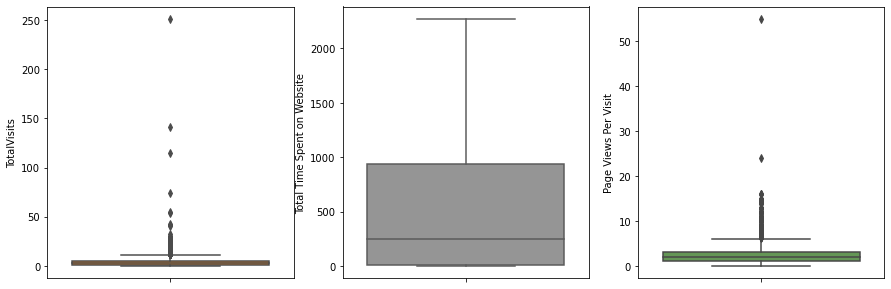

In [183]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', palette='autumn', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Greys', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='gist_earth', data = leads)
plt.show()

In [184]:
nn_quartile_total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < nn_quartile_total_visits]
leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [185]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.000000,9141.000000,9141.000000,9141.000000
mean,0.385406,3.179740,486.074609,2.329506
std,0.486718,2.913631,547.856302,2.046673
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,933.000000,3.000000
90%,1.000000,7.000000,1379.000000,5.000000
95%,1.000000,9.000000,1561.000000,6.000000
99%,1.000000,13.000000,1839.600000,9.000000


In [186]:
leads = leads[leads["Page Views Per Visit"] < leads['Page Views Per Visit'].quantile(0.99)]
leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [187]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


In [188]:
# Determine the percentage of data retained

num_data = round(100*(len(leads)/9240),2)
print(num_data)

97.72


In [189]:
# Removing Id values since they are unique for everyone
leads = leads.drop('Prospect ID',1)
leads.shape

(9029, 18)

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Visualizing the data
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Categorical Variable Analysis
            </span>   
        </font>    
</h2>

In [190]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Do Not Call                             9029 non-null   object 
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   Last Activity                           9029 non-null   object 
 9   What is your current occupation         9029 non-null   object 
 10  Search                                  9029 non-null   obje

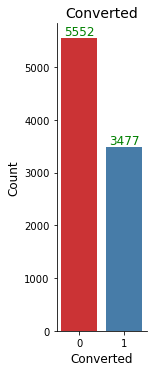

In [191]:
# Conversion Rate 

plot = sns.catplot(x='Converted', kind='count', data=leads, palette='Set1', aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel('Converted', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%.

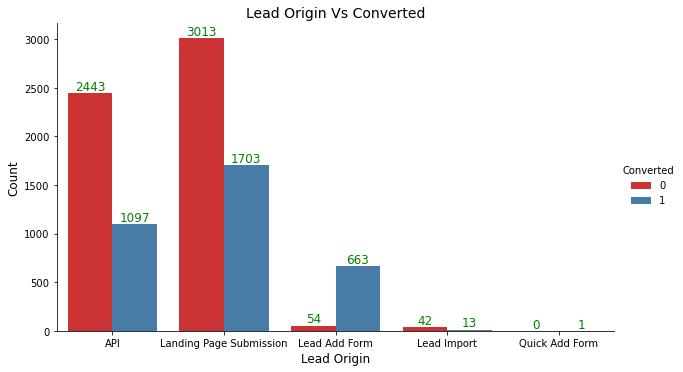

In [192]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads, palette="Set1", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission Also there was only one request from quick add form which got converted.

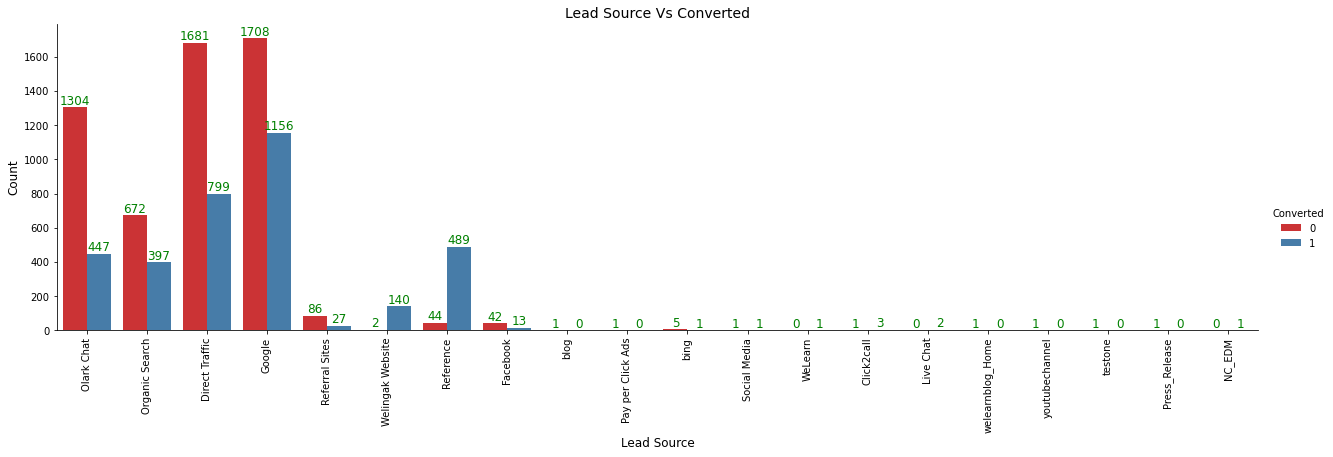

In [193]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google.

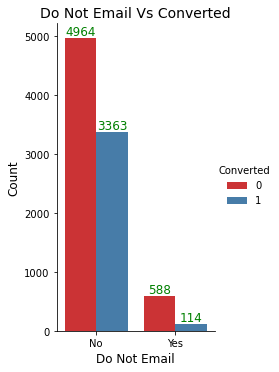

In [194]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent.

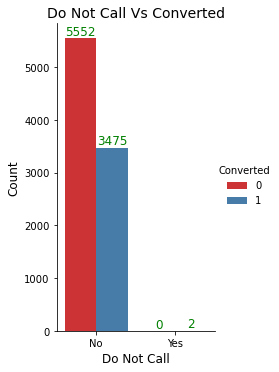

In [195]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

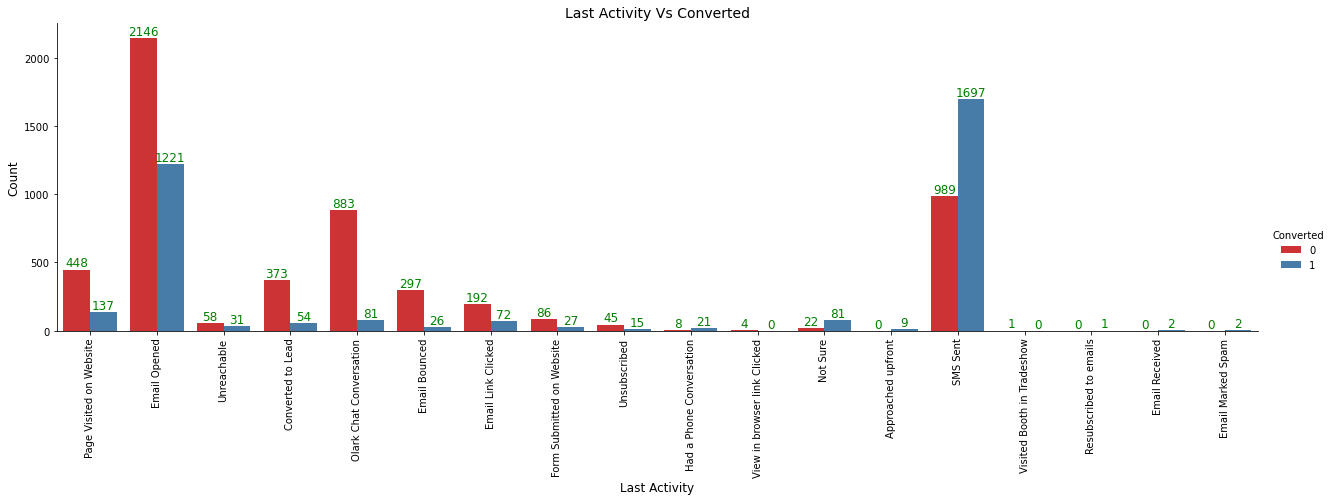

In [196]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 3.5);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')
   
plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion.

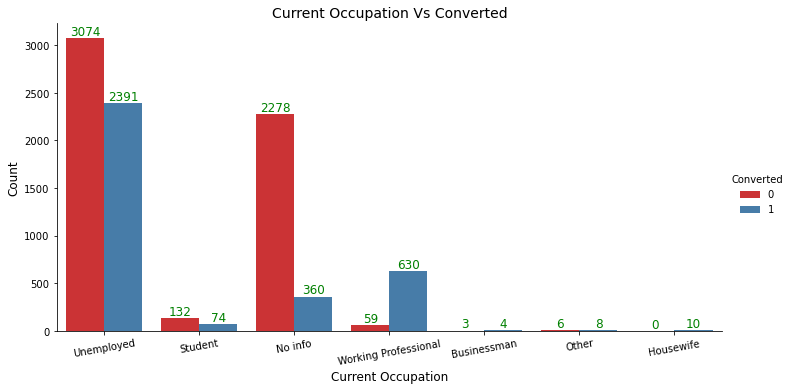

In [197]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leads, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that

- Out of 7 business men, 4 got converted.
- Out 10 housewives, all 10 leads got converted.

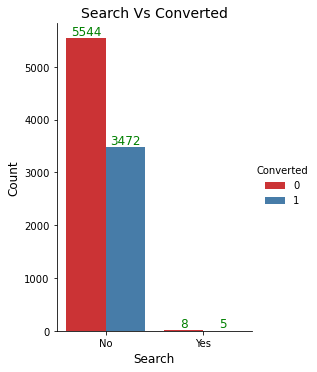

In [198]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

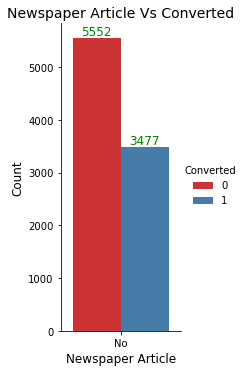

In [199]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [200]:
# Dropping Newspaper Article

leads = leads.drop(['Newspaper Article'], axis=1)

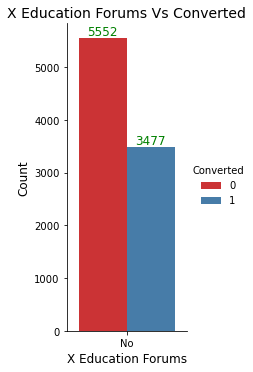

In [201]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

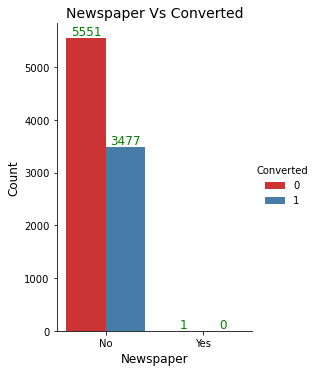

In [202]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')

plt.show()


Since "X Education Forums" and 'Newspaper' columns now have only one value for all rows - "No" , it is safe to drop these columns.

In [203]:
leads = leads.drop(['X Education Forums', 'Newspaper'], axis=1)

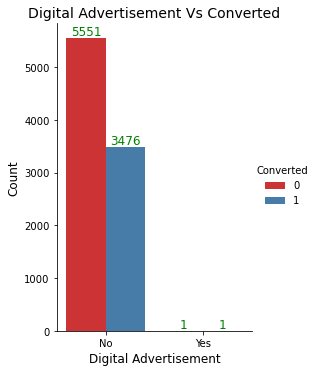

In [204]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted.

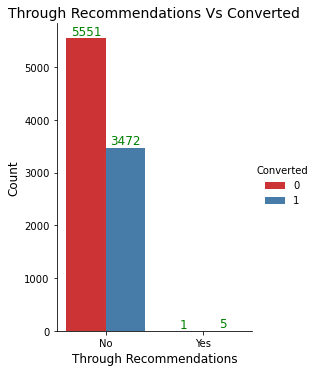

In [205]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted.

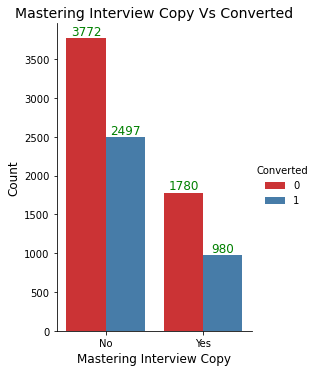

In [206]:

# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leads, palette="Set1",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='green', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews.

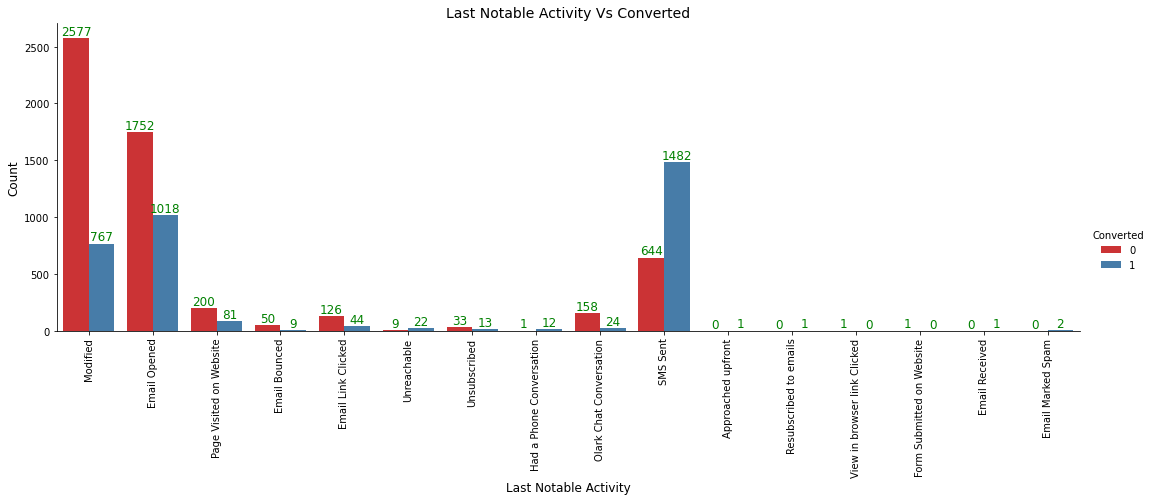

In [207]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leads, palette="Set1", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='green', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent".

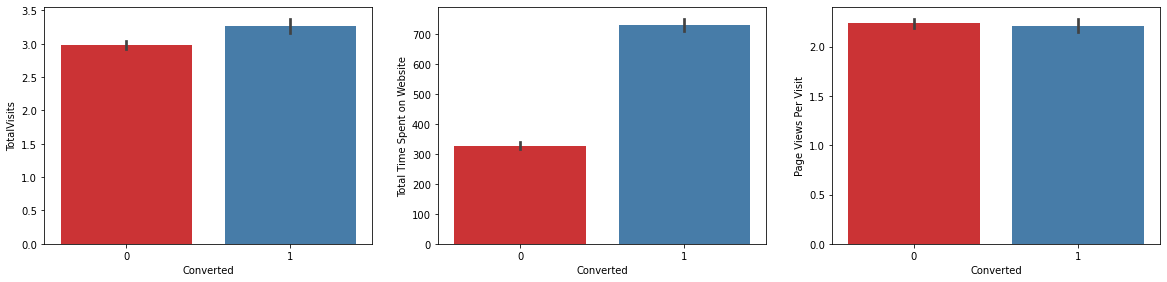

In [208]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = leads)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit.

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Data Preparation
        </span>    
    </font>
</h1>

In [209]:
variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads[variablelist] = leads[variablelist].apply(binary_map)

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Dummy Variable Creation and merging with main dataset
            </span>   
        </font>    
</h2>


**Creating dummies for the following columns below:**
1. Lead Origin
2. Lead Source
3. last Activity
4. What is your current occupation
5. Last Notable Activity

In [210]:
# Creating dummies for the following columns below

# Lead Origin

d_lead_origin = pd.get_dummies(leads['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, d_lead_origin1], axis = 1)

# Lead Source

d_lead_source = pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leads['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leads['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leads['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,d_last_notable_activity1], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_No info,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [211]:
# Remove following columns 

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [212]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [213]:
# check for null values in each column

leads.isnull().sum()

Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Search                                              0
Digital Advertisement                               0
Through Recommendations                             0
A free copy of Mastering The Interview              0
LeadOrigin_API                                      0
LeadOrigin_Landing Page Submission                  0
LeadOrigin_Lead Add Form                            0
LeadOrigin_Lead Import                              0
LeadSource_Click2call                               0
LeadSource_Direct Traffic                           0
LeadSource_Facebook                                 0
LeadSource_Google                                   0
LeadSource_Live Chat        

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Splitting the data into Train & Test Dataset
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Train & Test Split
            </span>   
        </font>    
</h2>

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

In [216]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Rescaling leads dataframe
            </span>   
        </font>    
</h2>

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_No info,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Building the Logistics Model
        </span>    
    </font>
</h1>

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            Manual Model Development using statsmodel
            </span>   
        </font>    
</h2>

**need to import the statsmodel.api library using which we'll perform the logistic regression.**

In [218]:
import statsmodels.api as sm

In [219]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Feb 2021   Deviance:                          nan
Time:                        22:27:28   Pearson chi2:                 8.42e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             2.096e+27   8.63e+19   2.43e+07      0.000     2.1e+27     2.1e+27
Do Not Email                                     -8.803e+13    4.5e+06  -1.96e+07      0.000    -8.8e+13    -8.8e+13
Do Not Call                                        6.45e+14   4.76e+07   1.35e+07      0.000    6.45e+14    6.45e+14
TotalVisits                                       1.312e+15   7.66e+06   1.71e+08      0.000    1.31e+15    1.31e+15
Total Time Spent on Website                       3.456e+15   4.04e+06   8.56e+08      0.000    3.46e+15    3.46e+15
Page Views Per Visit                              -7.29e+14   6.58e+06  -1.11e+08      0.000   -7.29e+14   -7.29e+14
Search                                           -1.269e+15   2.44e+07   -5.2e+07      0.000   -1.27e+15   -1.27e+15
Digital Advertisement                            -1.632e+15   4.76e+07  -3.43e+07      0.000   -1.63e+15   -1.63e+15
Through Recommendations                          -6.567e+14    4.2e+07  -1.56e+07      0.000   -6.57e+14   -6.57e+14
A free copy of Mastering The Interview           -1.158e+14    2.9e+06  -3.99e+07      0.000   -1.16e+14   -1.16e+14
LeadOrigin_API                                   -3.141e+15   6.74e+07  -4.66e+07      0.000   -3.14e+15   -3.14e+15
LeadOrigin_Landing Page Submission               -3.161e+15   6.74e+07  -4.69e+07      0.000   -3.16e+15   -3.16e+15
LeadOrigin_Lead Add Form                         -1.142e+15   6.87e+07  -1.66e+07      0.000   -1.14e+15   -1.14e+15
LeadOrigin_Lead Import                            -4.26e+15   8.27e+07  -5.15e+07      0.000   -4.26e+15   -4.26e+15
LeadSource_Click2call                            -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Direct Traffic                        -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Facebook                              -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Google                                -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Live Chat                             -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Olark Chat                            -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Organic Search                        -6.966e+25   9.09e+19  -7.67e+05      0.000   -6.97e+25   -6.97e+25
LeadSource_Pay per Click Ads                      1.281e+25   1.49e+18    8.6e+06      0.000    1.28e+25    1.28e+25
LeadSource_Press_Release                          9.342e+23   1.09e+17    8.6e+06      0.000    9.34e+23    9.34e+23
LeadSource_Reference                     

<h2>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            RFE
            </span>   
        </font>    
</h2>
<span style='font-family:Candra'>
    <p> Recursive feature elimination: We will be using the Logistics Regression function from SciKit Learn for its compatibility with RFE </p>
</span>   

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 1
            </span>   
        </font>    
</h3>

In [220]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [221]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(lr, 20)            
rfe = rfe.fit(X_train, y_train)

In [222]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 46),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_WeLearn', False, 47),
 

In [223]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No info',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 2
            </span>   
        </font>    
</h3>

In [224]:
X_train_sm = sm.add_constant(X_train[col])
log2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Sun, 07 Feb 2021   Deviance:                       5002.3
Time:                        22:27:33   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_No info                       -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

**Removing column LastActivity_Approached_Upfront as it has a high pvalue.**

In [225]:
col = col.drop('LastActivity_Approached upfront',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 3
            </span>   
        </font>    
</h3>

In [226]:
X_train_sm = sm.add_constant(X_train[col])
log3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Sun, 07 Feb 2021   Deviance:                       5013.2
Time:                        22:27:33   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_No info                       -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

**Removing column CurrentOccupation_Housewife as it has high pvalue and hence is insignificant**

In [227]:
col = col.drop('CurrentOccupation_Housewife',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 4
            </span>   
        </font>    
</h3>

In [228]:
X_train_sm = sm.add_constant(X_train[col])
log4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Sun, 07 Feb 2021   Deviance:                       5026.7
Time:                        22:27:33   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_No info                       -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

**Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant**

In [229]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 5
            </span>   
        </font>    
</h3>

In [230]:
X_train_sm = sm.add_constant(X_train[col])
log5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Sun, 07 Feb 2021   Deviance:                       5028.2
Time:                        22:27:33   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_No info                       -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

**Removing column LeadSource_Reference as it has high pvalue and hence is insignificant**

In [231]:
col = col.drop('LeadSource_Reference',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 6
            </span>   
        </font>    
</h3>

In [232]:
X_train_sm = sm.add_constant(X_train[col])
log6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Sun, 07 Feb 2021   Deviance:                       5029.6
Time:                        22:27:34   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_No info                       -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

**Removing column Search as it has high pvalue and hence insignificant**

In [233]:
col = col.drop('Search',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Model 7
            </span>   
        </font>    
</h3>

In [234]:
X_train_sm = sm.add_constant(X_train[col])
log7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Sun, 07 Feb 2021   Deviance:                       5032.5
Time:                        22:27:34   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_No info                       -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [235]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.692600
113     0.539248
4132    0.718698
5573    0.133628
1109    0.014225
2282    0.031692
2976    0.854208
8431    0.399257
2770    0.745493
5790    0.995570
dtype: float64

In [236]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69260021, 0.53924773, 0.71869827, 0.13362844, 0.01422486,
       0.03169166, 0.85420845, 0.39925732, 0.74549262, 0.99556994])

**Creating a dataframe with the actual converted flag and the predicted probabilities**

In [237]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.692600,2240
1,0,0.539248,113
2,1,0.718698,4132
3,0,0.133628,5573
4,0,0.014225,1109


**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [238]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.692600,2240,1
1,0,0.539248,113,1
2,1,0.718698,4132,1
3,0,0.133628,5573,0
4,0,0.014225,1109,0


<h4>   
      <font color = Darkblue >
            <span style='font-family:Candra'>
            confusion metrics and accuracy
            </span>   
        </font>    
</h4>

In [239]:
from sklearn import metrics

In [240]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3412  446]
 [ 712 1750]]


In [241]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8167721518987342


Accuracy rate is around 81% which is good. However, we also need to calculate the other metrics as we cannot solely depend only on the accuracy metrics.

**Checking VIFs**

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,Page Views Per Visit,6.11
1,TotalVisits,4.70
7,LastActivity_Email Opened,2.37
2,Total Time Spent on Website,2.14
9,LastActivity_SMS Sent,2.12
5,LeadSource_Olark Chat,2.10
13,LastNotableActivity_Modified,1.78
8,LastActivity_Olark Chat Conversation,1.76
4,LeadOrigin_Lead Add Form,1.62
10,CurrentOccupation_No info,1.57


**Removing column Page Views Per Visit as it has high VIF and hence insignificant**

In [243]:
col = col.drop('Page Views Per Visit',1)

<h3>   
      <font color = 'pale yellow' >
            <span style='font-family:Candra'>
            Final model
            </span>   
        </font>    
</h3>

In [244]:
X_train_sm = sm.add_constant(X_train[col])
log8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.2
Date:                Sun, 07 Feb 2021   Deviance:                       5044.4
Time:                        22:27:34   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6532      0.146    -18.185      0.000      -2.939      -2.367
Do Not Email                                    -1.1622      0.175     -6.649      0.000      -1.505      -0.820
TotalVisits                                      1.2254      0.247      4.954      0.000       0.741       1.710
Total Time Spent on Website                      4.5066      0.168     26.758      0.000       4.176       4.837
LeadOrigin_Lead Add Form                         3.7825      0.202     18.683      0.000       3.386       4.179
LeadSource_Olark Chat                            1.6450      0.124     13.263      0.000       1.402       1.888
LeadSource_Welingak Website                      2.0756      0.742      2.799      0.005       0.622       3.529
LastActivity_Email Opened                        0.4606      0.115      4.008      0.000       0.235       0.686
LastActivity_Olark Chat Conversation            -0.6504      0.188     -3.453      0.001      -1.020      -0.281
LastActivity_SMS Sent                            1.6433      0.116     14.213      0.000       1.417       1.870
CurrentOccupation_No info                       -1.2327      0.090    -13.734      0.000      -1.409      -1.057
CurrentOccupation_Working Professional           2.6138      0.203     12.876      0.000       2.216       3.012
LastNotableActivity_Had a Phone Conversation     3.4487      1.174      2.937      0.003       1.147       5.750
LastNotableActivity_Modified                    -0.5446      0.089     -6.095      0.000      -0.720      -0.369
LastNotableActivity_Unreachable                  1.9285      0.560      3.442      0.001       0.830       3.027
================================================================================================================
"""

In [245]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.63
2,Total Time Spent on Website,2.11
6,LastActivity_Email Opened,2.06
4,LeadSource_Olark Chat,1.94
8,LastActivity_SMS Sent,1.86
7,LastActivity_Olark Chat Conversation,1.75
12,LastNotableActivity_Modified,1.68
3,LeadOrigin_Lead Add Form,1.57
9,CurrentOccupation_No info,1.57
5,LeadSource_Welingak Website,1.30


Now, All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model 8.

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Model Validation
        </span>    
    </font>
</h1>

<h2>
    <span style='font-family:Candra'>
        <font color = Darkblue>
    Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value 
        </font>
            </span> 
        </h2>

In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:
#SENSITIVITY

TP / float(TP+FN)

0.710804224207961

In [248]:
#SPECIFICITY

TN / float(TN+FP)

0.8843960601347849

In [249]:
#False postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))


0.11560393986521514


In [250]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7969034608378871


In [251]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8273520853540253


<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Plotting the ROC Curve
        </span>    
    </font>
</h1> 

In [252]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [253]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

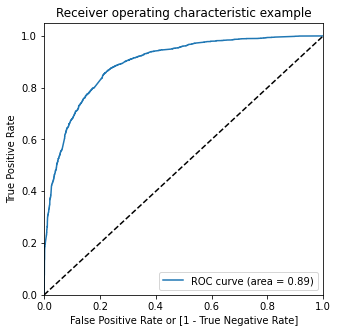

In [254]:
roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
        Finding Optimal Cutoff Point
        </span>    
    </font>
</h1> 

Optimal cut off probability is that probability of intersection point at which there is a balance between sensitivity and specificity

In [255]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0


In [256]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.389557,1.000000,0.000000
0.1,0.1,0.659335,0.972380,0.459565
0.2,0.2,0.760601,0.922421,0.657335
0.3,0.3,0.802532,0.879366,0.753499
0.4,0.4,0.816614,0.782291,0.838517
0.5,0.5,0.816772,0.710804,0.884396
0.6,0.6,0.811234,0.642973,0.918611
0.7,0.7,0.785127,0.531682,0.946864
0.8,0.8,0.762816,0.443948,0.966304
0.9,0.9,0.720570,0.302193,0.987558


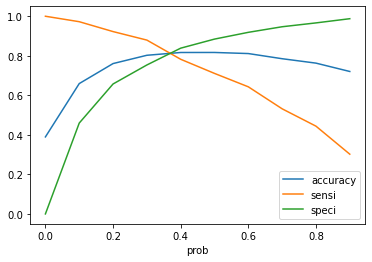

In [257]:
#plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.38 is the optimum point to take it as a cutoff probability.**

In [258]:
# Let us make the final prediction using 0.38 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [259]:
#calculating the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1,69
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1,54
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.031692,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.854208,2976,1,1,1,1,1,1,1,1,1,1,0,1,85
7,0,0.399257,8431,0,1,1,1,1,0,0,0,0,0,0,1,40
8,1,0.745493,2770,1,1,1,1,1,1,1,1,1,0,0,1,75
9,1,0.995570,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [260]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1959
0     503
Name: final_predicted, dtype: int64

In [261]:
# check the precentage of final_predicted conversions

1959/float(1959+503)

0.7956945572705117

**Hence we can see that the final prediction of conversions have a target of 80% (79.5%) conversion as per the X Educations CEO's requirement . Hence this is a good model.**


In [262]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8155063291139241

In [263]:
# confusion matric

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3195,  663],
       [ 503, 1959]], dtype=int64)

In [264]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [265]:
#  sensitivity 

TP / float(TP+FN)


0.7956945572705117

In [266]:
#  specificity

TN / float(TN+FP)

0.828149300155521

In [267]:
# false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.171850699844479


In [268]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7471395881006865


In [269]:
# Negative predictive value

print (TN / float(TN+ FN))


0.863980530016225


In [270]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3412,  446],
       [ 712, 1750]], dtype=int64)

<h2>
    <span style='font-family:Candra'>
        <font color = Darkblue>
    Precision and recall tradeoff 
        </font>
            </span> 
        </h2>

In [271]:
from sklearn.metrics import precision_score, recall_score

In [272]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.7969034608378871

In [273]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.710804224207961

In [274]:
from sklearn.metrics import precision_recall_curve

In [275]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [276]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


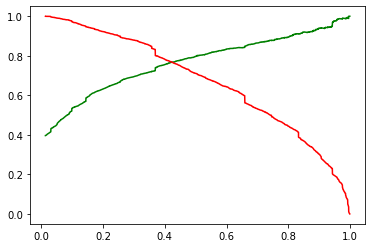

In [277]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<h1>
    <font color = Darkblue>
        <span style='font-family:Candra'>
       Making predictions on the test set
        </span>    
    </font>
</h1>

In [278]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [279]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No info,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,0,0,0,0,0,1,0,0,0,0,0


In [280]:
X_test_sm = sm.add_constant(X_test)

In [281]:
y_test_pred = res.predict(X_test_sm)

In [282]:
y_test_pred[:10]

2296    0.901868
8697    0.587969
7378    0.213572
8631    0.660152
4799    0.950680
4503    0.354912
7129    0.872954
1717    0.144281
8398    0.867851
5116    0.251214
dtype: float64

In [283]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2296,0.901868
8697,0.587969
7378,0.213572
8631,0.660152
4799,0.950680


In [284]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [285]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [286]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [287]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [288]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.901868
1,0,8697,0.587969
2,0,7378,0.213572
3,0,8631,0.660152
4,1,4799,0.950680


In [289]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [290]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.901868
1,0,8697,0.587969
2,0,7378,0.213572
3,0,8631,0.660152
4,1,4799,0.950680


In [291]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [292]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.901868,1,90
1,0,8697,0.587969,1,59
2,0,7378,0.213572,0,21
3,0,8631,0.660152,1,66
4,1,4799,0.950680,1,95
5,0,4503,0.354912,0,35
6,0,7129,0.872954,1,87
7,0,1717,0.144281,0,14
8,0,8398,0.867851,1,87
9,1,5116,0.251214,0,25


In [293]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    806
0    209
Name: final_predicted, dtype: int64

In [294]:
# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

- Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set)


<h2>
    <span style='font-family:Candra'>
        <font color = Darkblue>
    Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set 
        </font>
            </span> 
        </h2>


In [295]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132152085640457

In [296]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  297],
       [ 209,  806]], dtype=int64)

In [297]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [298]:
#sensitivity 
TP / float(TP+FN)

0.7940886699507389

In [299]:
#specificity
TN / float(TN+FP)

0.8246753246753247

<h2>
    <span style='font-family:Candra'>
        <font color = Darkblue>
    Precision and Recall metrics for the test set 
        </font>
            </span> 
        </h2>



In [300]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7307343608340888
recall  0.7940886699507389


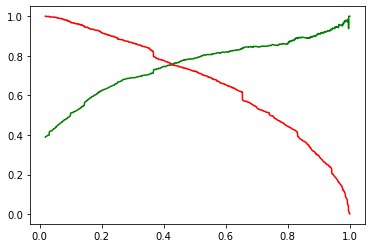

In [301]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


<h1>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Model Analysis       
        </font>  
     </span>   
    </h1>


- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.  

<h1>   
    <span style='font-family:Candra'>  
    <font color = Darkblue >
          Business Analysis       
        </font>  
     </span>   
    </h1>
    
The top three variables that contribute most towards the probability of a lead getting converted:
- Total Time Spent on Website
- Lead Add Form (from Lead Origin)
- Had a Phone Conversation (from Last Notable Activity)
<br>
<br>

The following are the top three categorical/dummy variables that should be focused the most in order to increase the probability of lead conversion:
- Lead Add Form (from Lead Origin)
- Had a Phone Conversation (from Last Notable Activity)
- Working Professional (from What is your current occupation)

